In [1]:
from util.helper import collect_confusion_set_frequencies, extract_word_statistics

import os
import pandas as pd
import spacy

In [2]:
confusion_set_strings = []
word_list = []

with open('input/confusion_sets_modified.csv', 'r') as f:
    for line in f.readlines():
        confusion_set = line.strip()
        word_list.extend(confusion_set.split(','))
        confusion_set_strings.append(confusion_set)

#### Analysis of 10k data set

In [3]:
file_name = 'output/report_word_statistics_10k_23.csv'

if not os.path.isfile(file_name):
    org_file_name = 'input/eng_news_2023_10K-sentences.txt'
    nlp = spacy.load('en_core_web_sm')
    temp_df = extract_word_statistics(org_file_name, nlp, word_list)
    temp_df['frequency'] =temp_df['sentence_indices'].apply(lambda x: len(x.split(',')) if type(x) == str and len(x) > 1 else 0)
    temp_df.to_csv(file_name, index=False, mode='x', sep=';')
else:
    temp_df = pd.read_csv(file_name, sep=';')

temp_df

,word,sentence_indices,frequency
0,Except,2162,1
1,accept,"1232,1651,3523,5331,5795,6085,7121,9195,9649",9
2,except,"565,846,863,2683,2937,3508,4078,4883,5262,5595...",11
3,advice,"267,644,906,995,1659,2305,2406,2636,3210,3674,...",20
4,advise,3260,1
...,...,...,...
162,world,"87,124,158,387,477,496,567,814,913,1064,1084,1...",102
163,You,"125,848,1689,1914,2017,2105,2866,3295,3295,337...",99
164,Your,"2843,2871,4490,5755,6103,8726,8910,9964,9968",9
165,you,"16,43,63,63,128,128,128,185,200,222,222,230,28...",637


<Axes: title={'center': 'confusion set frequency distribution of 10k data set'}>

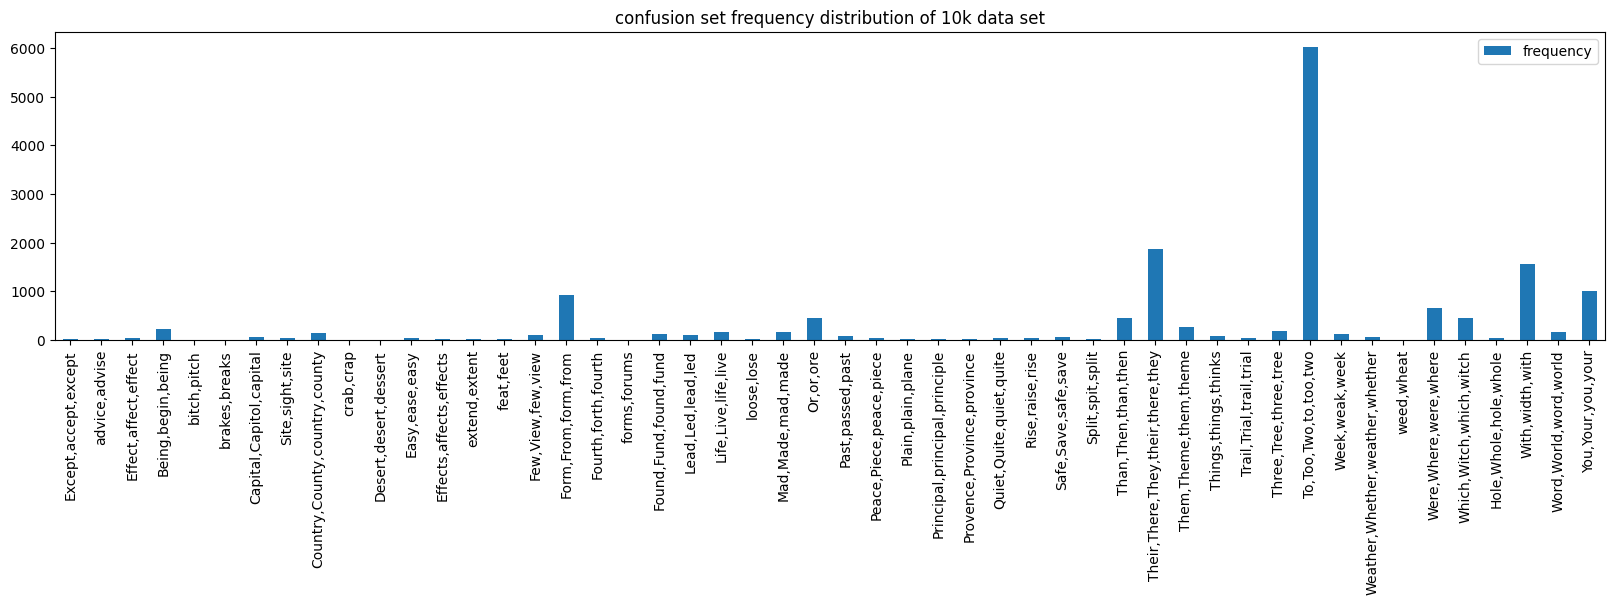

In [4]:
df_10k = collect_confusion_set_frequencies(temp_df, confusion_set_strings)
df_10k['frequency %'] = df_10k['frequency'].apply(lambda x: x / df_10k['frequency'].max())
df_10k.plot(y='frequency', kind="bar", figsize=(20,4), title='confusion set frequency distribution of 10k data set')

#### Analysis of 1M data set

In [6]:
file_name = 'output/report_word_statistics_1M_23.csv'

if not os.path.isfile(file_name):
    org_file_name = 'input/eng_news_2023_1M-sentences.txt'
    nlp = spacy.load('en_core_web_sm')
    temp_df = extract_word_statistics(org_file_name, nlp, word_list)
    temp_df['frequency'] =temp_df['sentence_indices'].apply(lambda x: len(x.split(',')) if type(x) == str else 0)
    temp_df.to_csv(file_name, index=False, mode='x', sep=';')
else:
    temp_df = pd.read_csv(file_name, sep=';')

temp_df

,word,sentence_indices,frequency
0,Except,"187686,214438,214439,214440,214441,214442,2144...",86
1,accept,"1446,1461,4711,5129,6646,8918,9916,10292,12969...",847
2,except,"3982,4342,10214,10318,11689,11823,12423,13585,...",566
3,advice,"3166,4758,7965,9957,10446,10849,11056,11134,12...",1173
4,advise,"4106,4169,9807,22973,27943,31831,32667,37323,3...",202
...,...,...,...
162,world,"188,191,525,545,684,1085,1125,1164,1520,1538,1...",10865
163,You,"150,1114,1576,2179,2248,2759,3853,4420,6899,75...",9600
164,Your,"3422,5172,5196,8396,8396,9735,11179,11737,1198...",1333
165,you,"6,41,81,92,93,106,115,153,170,206,268,286,340,...",63344


<Axes: title={'center': 'confusion set frequencies of 1M data set'}>

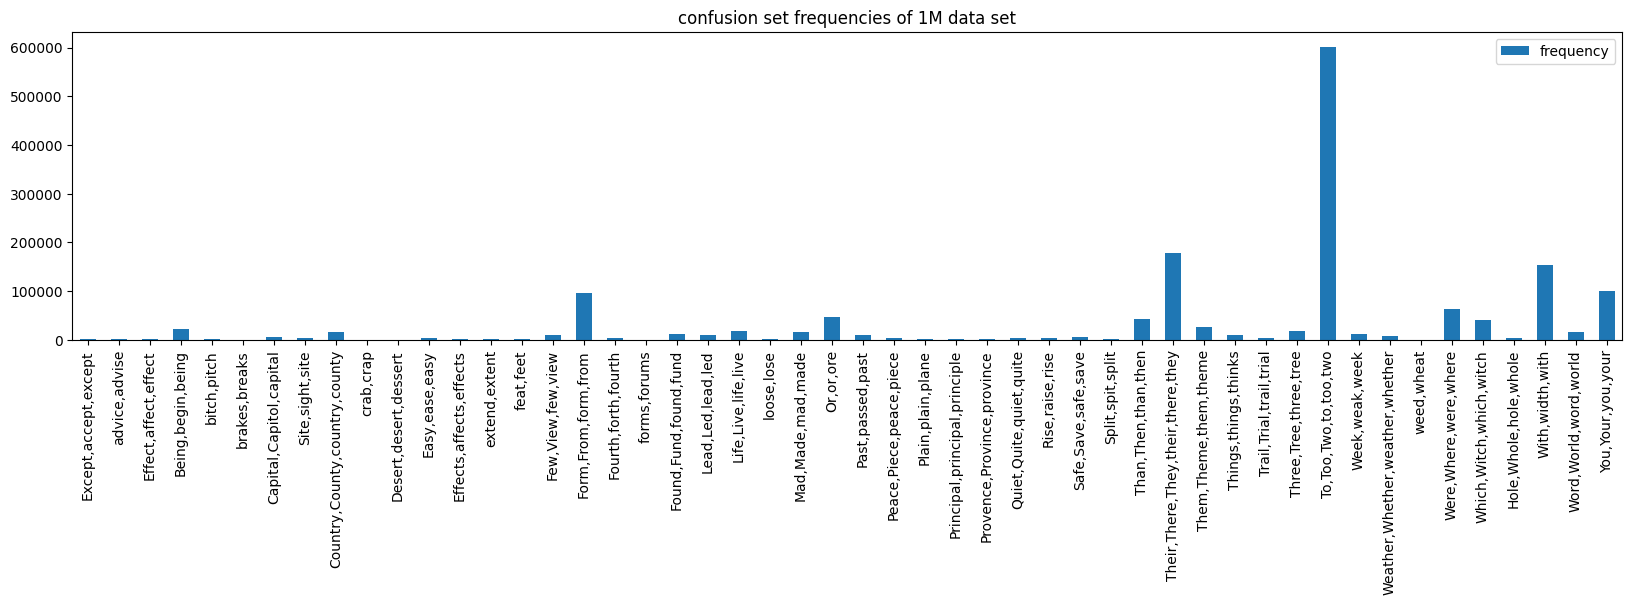

In [7]:
df_1M = collect_confusion_set_frequencies(temp_df, confusion_set_strings)
df_1M['frequency %'] = df_1M['frequency'].apply(lambda x: x / df_1M['frequency'].max())
df_1M.plot(y='frequency', kind="bar", figsize=(20,4), title="confusion set frequencies of 1M data set")

### Balancing

In [9]:
file_name = 'output/report_balancing.csv'

balanced_dict = dict()

if not os.path.isfile(file_name):
    limit = 100
    word_frequencies = pd.read_csv('output/report_word_statistics_1M_23.csv', index_col=0, sep=';')

    for confusion_set in confusion_set_strings:
        balanced_dict[confusion_set] = dict()
        current_confusion_set_dict = dict()
        for item in [item for item in confusion_set.split(',')]:
            if item in word_frequencies.index:
                indices = word_frequencies.loc[item]['sentence_indices']
                if type(indices) is str:
                    current_confusion_set_dict[item] = indices.split(',')

        result_set = set()
        while len(result_set) < limit:
            tmp_list = []
            for key in current_confusion_set_dict.keys():
                if len(current_confusion_set_dict[key]) > 0:
                    tmp_list.append(int(current_confusion_set_dict[key].pop(0)))
            if len(tmp_list) == 0:
                break
            result_set = result_set.union(set(tmp_list))

        balanced_dict[confusion_set] = sorted(result_set)[:limit]

    with open(file_name, 'w') as f:
        for key, value in balanced_dict.items():
            print(key, ','.join([str(item) for item in value]), file=f, end='\n', sep='\t')

else:
    with open(file_name, 'r') as f:
        for line in f.readlines():
            key, value = line.strip().split('\t')
            balanced_dict[key] = [int(idx) for idx in value.split(',')]

pd.DataFrame(balanced_dict)

,"Except,accept,except","advice,advise","Effect,affect,effect","Being,begin,being","bitch,pitch","brakes,breaks","Capital,Capitol,capital","Site,sight,site","Country,County,country,county","crab,crap",...,"To,Too,Two,to,too,two","Week,weak,week","Weather,Whether,weather,whether","weed,wheat","Were,Where,were,where","Which,Witch,which,witch","Hole,Whole,hole,whole","With,width,with","Word,World,word,world","You,Your,you,your"
0,1446,3166,77,31,634,186,320,26,39,21233,...,1,106,319,2560,19,60,1341,8,188,6
1,1461,4106,290,117,2336,705,739,174,85,44955,...,2,126,522,2752,35,106,1342,16,191,41
2,3982,4169,308,130,3000,1542,826,213,107,57371,...,4,131,1106,8940,44,116,1430,38,338,81
3,4342,4758,1401,135,3016,6547,946,486,303,62195,...,8,197,1287,23385,78,117,1467,60,383,92
4,4711,7965,1482,159,5630,7680,1279,742,394,64650,...,15,370,1616,26375,79,122,1584,81,525,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,214465,272005,418382,110611,846549,824907,61129,487396,27385,852726,...,160814,70027,621917,410929,591567,242978,487038,598085,253408,40948
96,214466,277965,427829,110612,856723,830285,63801,499128,27622,864725,...,173024,70471,623638,420470,596007,244485,508510,599039,267791,49621
97,214467,306130,431813,110613,866943,873832,64590,512321,28629,934408,...,185781,76559,630460,425462,652227,263431,515744,613479,275956,58943
98,214468,306840,451541,110614,905668,874705,68321,520130,30317,935152,...,207375,76594,636459,427059,666298,264866,566969,674537,281871,61480


<Axes: title={'center': 'selected sentences by confusion set for balanced data set'}>

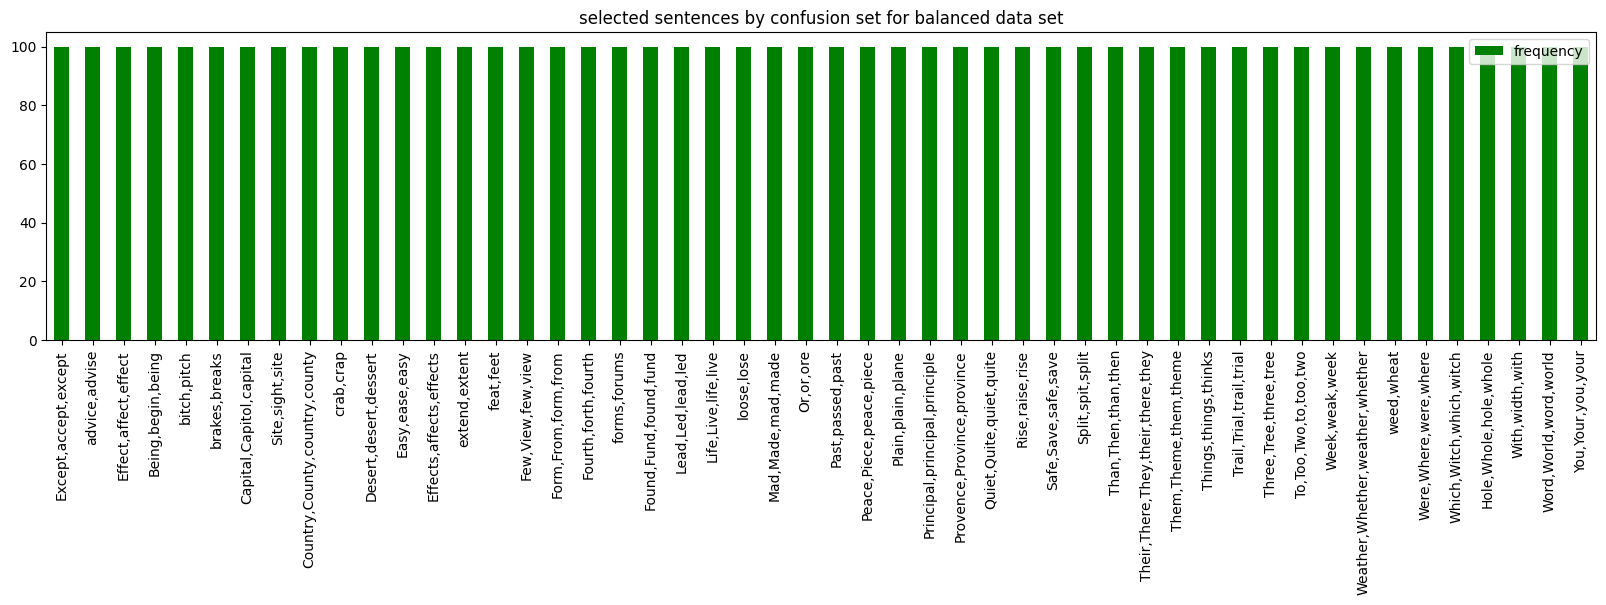

In [10]:
temp_df = pd.DataFrame(balanced_dict).count().to_frame('frequency')
temp_df.plot(kind="bar", figsize=(20,4), color='g', title='selected sentences by confusion set for balanced data set')

In [11]:
file_name = 'input/eng_news_2023-balanced-sentences.csv'

if not os.path.isfile(file_name):

    unique_indices = []
    for value in balanced_dict.values():
        unique_indices.extend(value)
    unique_indices = sorted(set(unique_indices))
    max_idx = max(unique_indices)

    with open(file_name, 'w') as f:
        with open('input/eng_news_2023_1M-sentences.txt', 'r') as input_file:
            for line in input_file.readlines():
                idx = int(line.strip().split('\t')[0])
                if idx > max_idx: # requires input sentences to be sorted
                    break
                if idx in unique_indices:
                    print(line.strip(), end='\n', file=f)

### Analysis of balanced data set

In [12]:
file_name = 'output/report_word_statistics_balanced.csv'

if not os.path.isfile(file_name):
    org_file_name = 'input/eng_news_2023-balanced-sentences.csv'
    nlp = spacy.load('en_core_web_sm')
    temp_df = extract_word_statistics(org_file_name, nlp, word_list)
    temp_df['frequency'] =temp_df['sentence_indices'].apply(lambda x: len(x.split(',')) if type(x) == str else 0)
    temp_df.to_csv(file_name, index=False, mode='x', sep=';')
else:
    temp_df = pd.read_csv(file_name, sep=';')

temp_df

,word,sentence_indices,frequency
0,Except,"187686,214438,214439,214440,214441,214442,2144...",32
1,accept,"1446,1461,4711,5129,6646,8918,9916,10292,12969...",35
2,except,"3982,4342,10214,10318,11689,11823,12423,13585,...",38
3,advice,"3166,4758,7965,9957,10446,10849,11056,11134,12...",54
4,advise,"4106,4169,9807,22973,27943,31831,32667,37323,3...",51
...,...,...,...
162,world,"188,191,525,545,684,1085,1125,1164,1520,1538,1...",79
163,You,"150,1114,1576,2179,2248,2759,3853,4420,6899,75...",62
164,Your,"3422,5172,5196,8396,8396,9735,11179,11737,1198...",38
165,you,"6,41,81,92,93,106,115,153,170,206,268,286,340,...",297


<Axes: title={'center': 'confusion set frequencies of 10k data set'}>

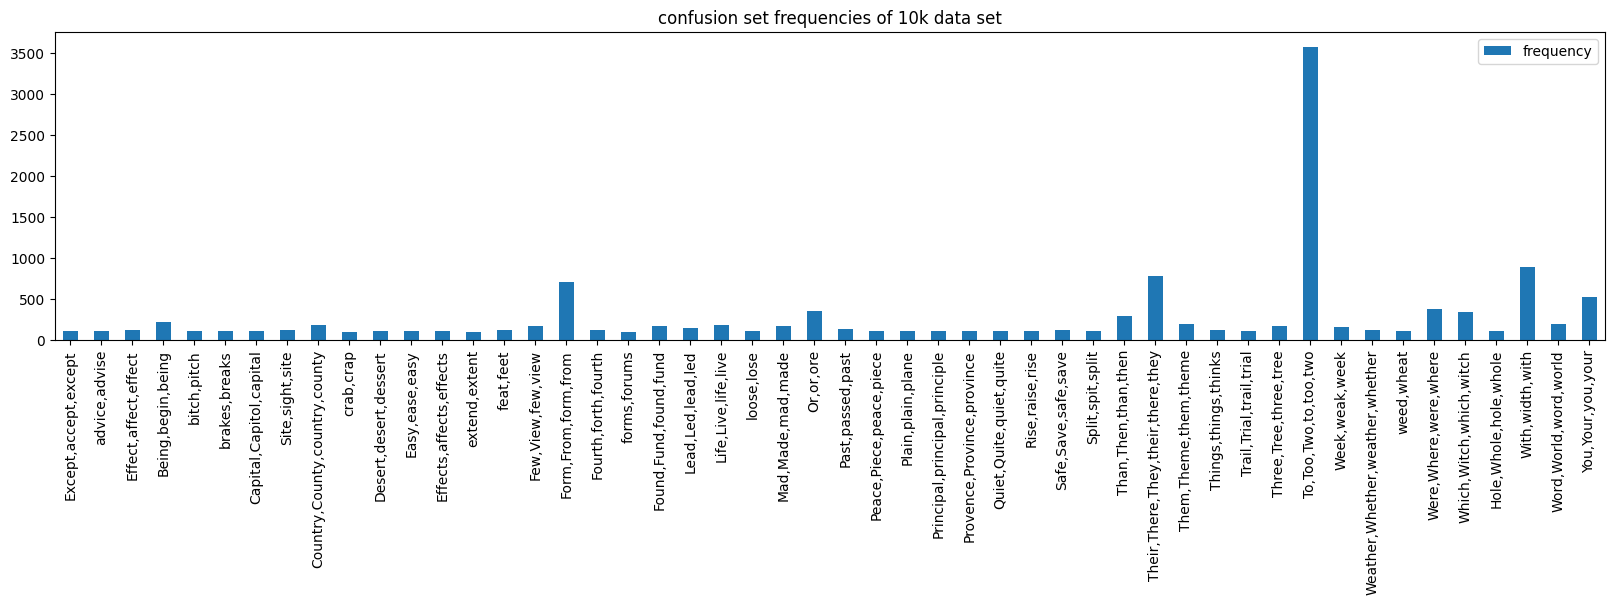

In [13]:
df_balanced = collect_confusion_set_frequencies(temp_df, confusion_set_strings)
df_balanced['frequency %'] = df_balanced['frequency'].apply(lambda x: x / df_balanced['frequency'].max())
df_balanced.plot(y='frequency', kind="bar", figsize=(20,4), title='confusion set frequencies of 10k data set')

## Comparison

<Axes: title={'center': 'confusion set frequency distribution by data set'}>

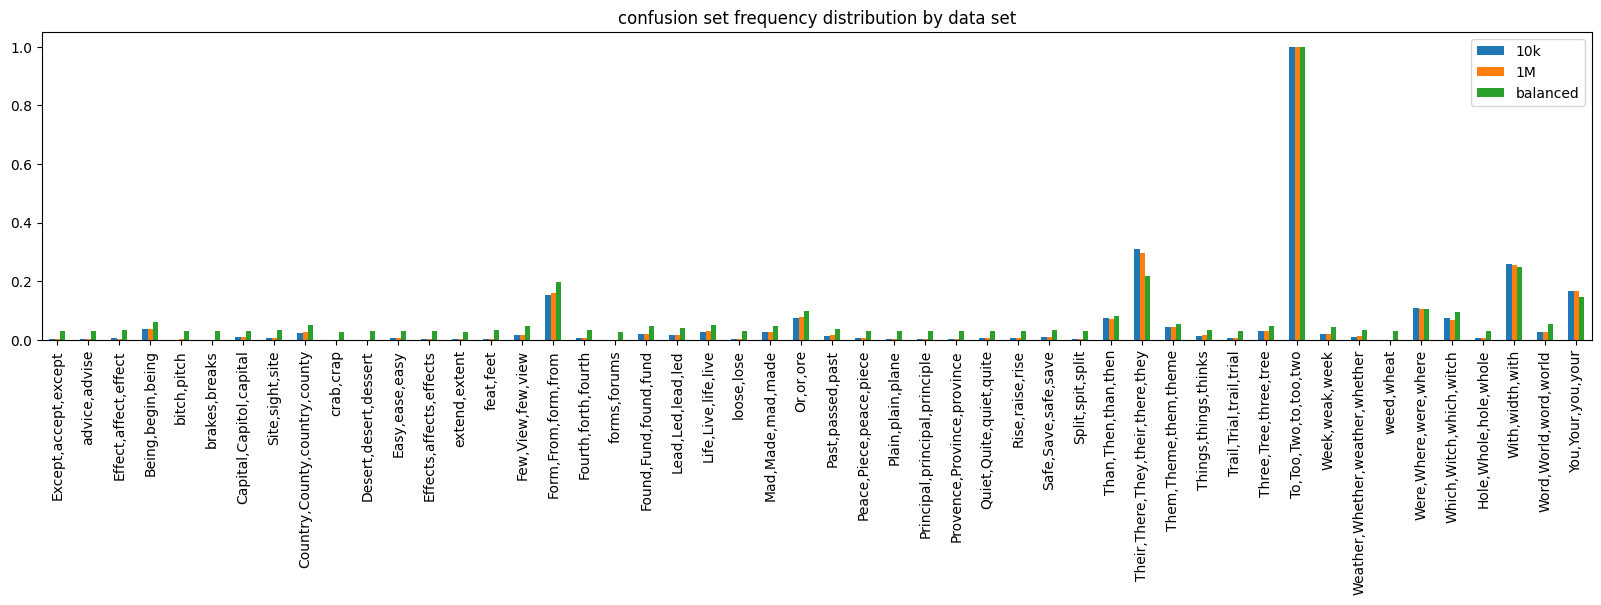

In [33]:
index = list(df_10k.index)
data_10k = list(df_10k['frequency %'])
data_1M = df_1M['frequency %']
data_balanced = df_balanced['frequency %']

tmp_df = pd.DataFrame({
    'sets':index,
    '10k':data_10k,
    '1M':data_1M,
    'balanced':data_balanced
})
tmp_df.plot(kind="bar", figsize=(20,4), title=f'confusion set frequency distribution by data set')